### Test on ECG Data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).

Try to design and train your MLP to classify normal and abnormal ECG samples.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

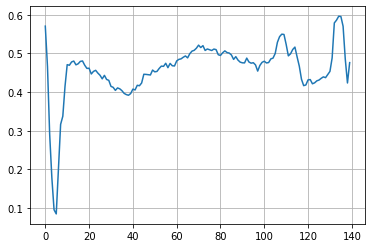

In [11]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# plot data
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.show()

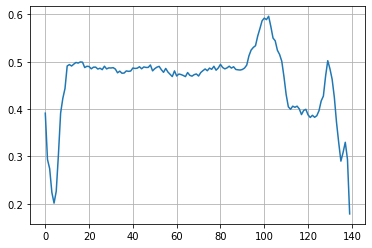

In [12]:
plt.grid()
plt.plot(np.arange(140), train_data[100])
plt.show()

More about the dataset from the link,
"The original dataset for "ECG5000" is a 20-hour long ECG downloaded from Physionet. The name is BIDMC Congestive Heart Failure Database(chfdb) and it is record "chf07". It was originally published in "Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23)". The data was pre-processed in two steps: (1) extract each heartbeat, (2) make each heartbeat equal length using interpolation. This dataset was originally used in paper "A general framework for never-ending learning from time series streams", DAMI 29(6). After that, 5,000 heartbeats were randomly selected. The patient has severe congestive heart failure and the class values were obtained by automated annotation"

See [link dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000) 

In [13]:
# Claim models
import keras
import matplotlib.pyplot as plt

# The input size/image
input_img = keras.Input(shape=(140,))
# The size of latent space
encoding_dim = 32
## Add a simple encode layer
#encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
#You can add encode layer with a L1 activity regularizer
# Rectified Linear Unit
encoded = keras.layers.Dense(encoding_dim, activation='sigmoid', 
                activity_regularizer=keras.regularizers.l1(10e-5))(input_img)
# Add decode layer
decoded = keras.layers.Dense(140, activation='sigmoid')(encoded)

# Claim autoencoder model
model_autoencoder = keras.Model(input_img, decoded)

# Claim a separate encoder model
model_encoder = keras.Model(input_img, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_autoencoder.layers[-1]
# Create the decoder model
model_decoder = keras.Model(decoder_input, decoder_layer(decoder_input))


Epoch 1/100
16/16 [==============================] - 1s 24ms/step - loss: 0.7040 - val_loss: 0.6921
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6908 - val_loss: 0.6882
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6876 - val_loss: 0.6865
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6862 - val_loss: 0.6857
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6854 - val_loss: 0.6853
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6851 - val_loss: 0.6851
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6850 - val_loss: 0.6850
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6848 - val_loss: 0.6849
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6848 - val_loss: 0.6848
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6847 - val_loss: 0.6848
Epoch 11

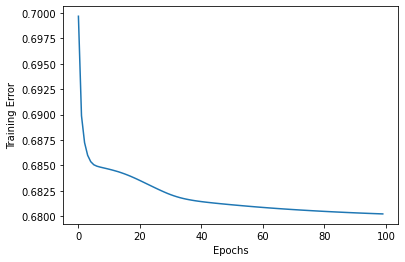

In [14]:
# Training
# Claim compile property for training
model_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
hist=model_autoencoder.fit(train_data, train_data,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(test_data, test_data))

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

In [15]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = model_encoder.predict(test_data)
decoded_imgs = model_decoder.predict(encoded_imgs)


Epoch 1/100
125/125 [==============================] - 1s 1ms/step - loss: 1.4978 - accuracy: 0.5442
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.9311
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.9405
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9485
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9558
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9553
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1126 - accuracy: 0.9652
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1028 - accuracy: 0.9650
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9729
Epoch 10/100
125/125 [==============================] - 0s 1ms/step - loss: 0.0845 - accura

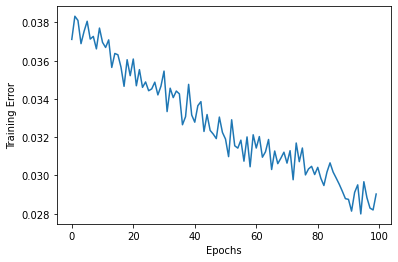

In [16]:
model = keras.Sequential()
model.add(model_encoder.layers[0])
model.add(model_encoder.layers[1])
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(train_labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(train_data, one_hot_labels, epochs=100, batch_size=32)

hist1=model.fit(train_data, one_hot_labels, epochs=100, batch_size=32)

plt.plot(hist1.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model.predict(test_data), axis=1)
print("F1 Score:  ", f1_score(test_labels, y_pred, average="macro"))
print("Precision: ", precision_score(test_labels, y_pred, average="macro"))
print("Recall:    ", recall_score(test_labels, y_pred, average="macro"))
print("Accuracy:  ", np.mean((test_labels==y_pred)*1.0))

F1 Score:   0.9898489111942147
Precision:  0.990095711662523
Recall:     0.9896103896103896
Accuracy:   0.99
